# <center> Experiment 7 </center>

## Convolutional Neural Networks

Title :- Forward pass with matrix multiplication Forward pass with hidden layer (matrix multiplication)  Forward pass with matrix multiplication with           Keras Forward passes with hidden layer (matri
 multiplication) with Ker.      <Br>
.
Aim:- To Implement Forward pass with matrix multiplication Forward pass with hidden layer Forw d
 pass with matrix multiplication with Ke    
          ras For ard passes with hidden layer with Keras.

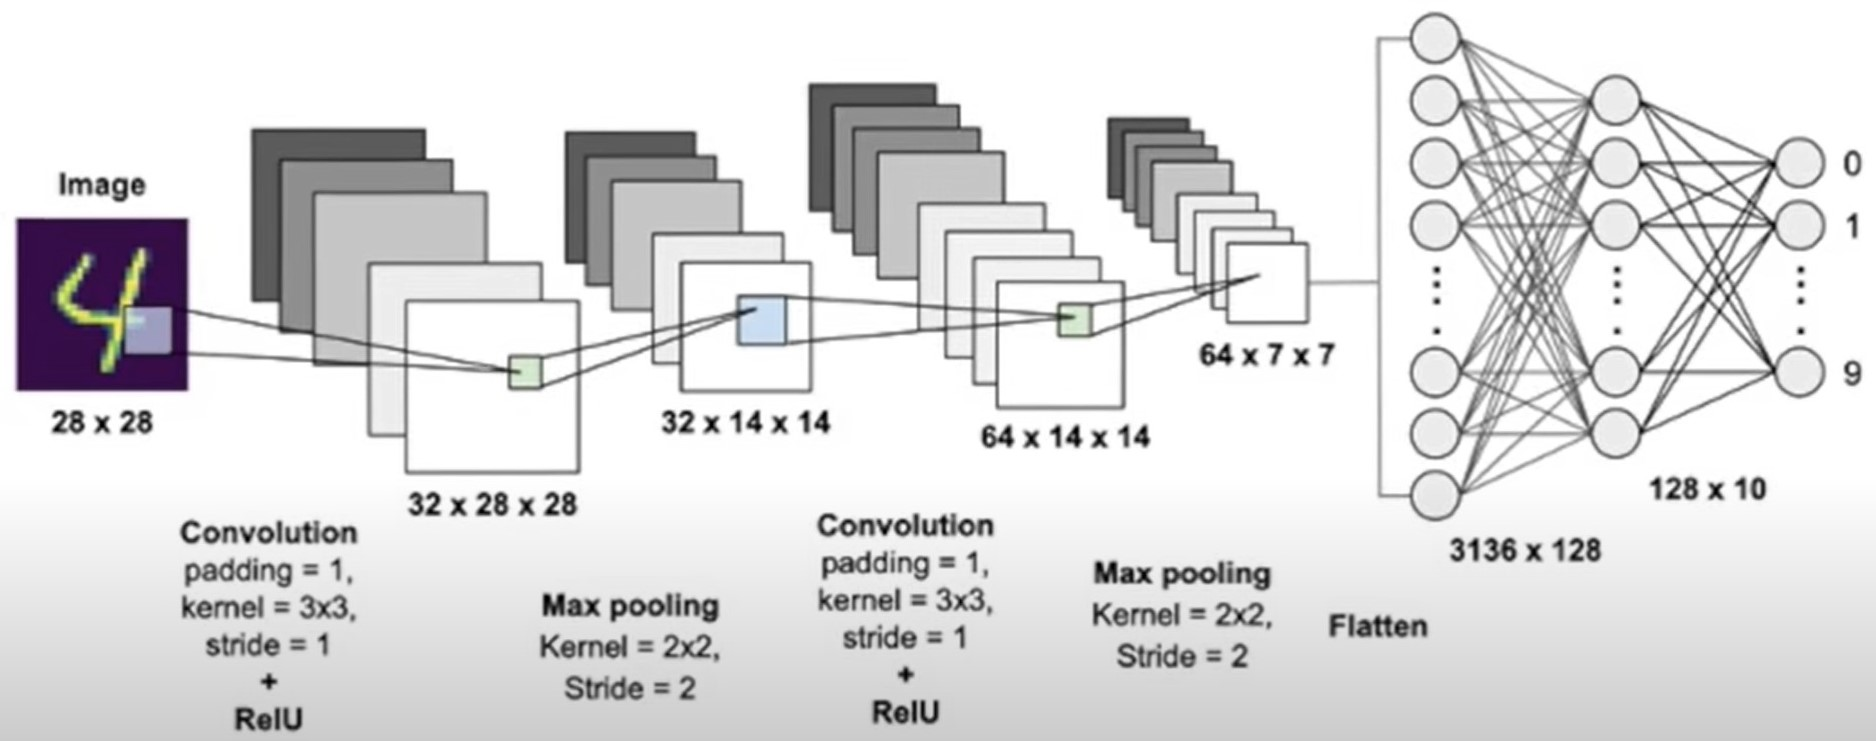

In [1]:
from IPython.display import Image
Image(filename='dl.jpg')

In [2]:
import numpy as np
from numpy import asarray 

In [3]:
data = [[3,3,2,1,0],
        [0,0,1,3,1],
        [3,1,2,2,3],
        [2,0,0,2,2],
        [2,0,0,0,1]]

In [4]:
data=np.asarray(data)

In [5]:
data=data.reshape(1,5,5,1)

In [6]:
kernel = [[[[0]], [[1]], [[2]]],
           [[[2]], [[2]], [[0]]],
           [[[0]], [[1]], [[2]]]]          

In [7]:
weights=[asarray(kernel), asarray([0.0])]

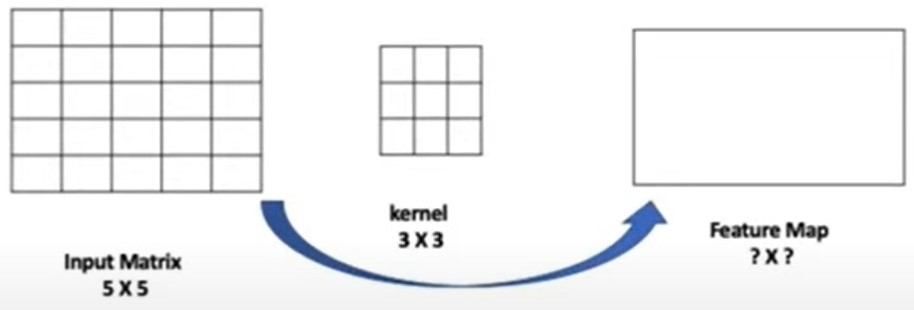

In [8]:
Image(filename='dl1.jpg')

## KERNEL


- Kernel is nothing but a filter that is used to extract the features from the images.

- The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.

- Kernel moves on the input data by the stride value

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(5,5,1)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 3, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.set_weights(weights)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 155ms/step
[12.0, 12.0, 17.0]
[10.0, 17.0, 19.0]
[9.0, 6.0, 14.0]


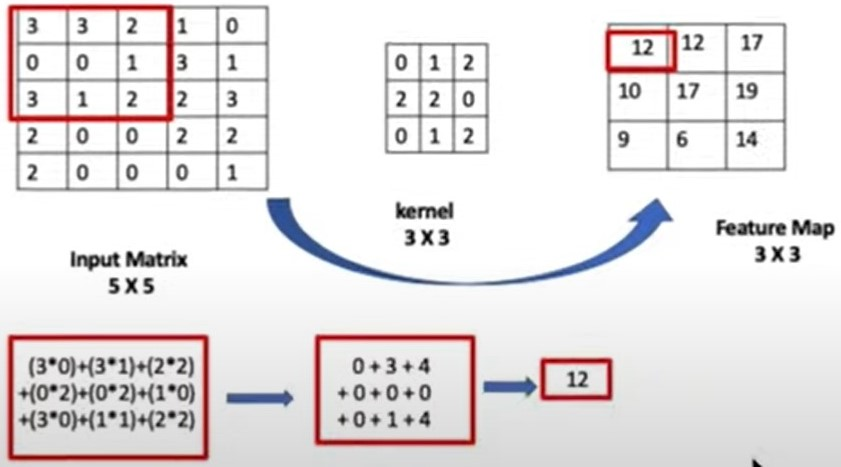

In [11]:
from IPython.display import Image
Image(filename='dl2.jpg')

## STRIDE


•The filter is moved across the image left to right, top to bottom, with a one-pixel column change on the horizontal movements, then a one-pixel row change on the vertical movements.

•The amount of movement between applications of the filter to the input image is referred to as the stride, and it is almost always symmetrical in height and width dimensions.

•The default stride or strides in two dimensions is (1,1) for the height and the width movement 

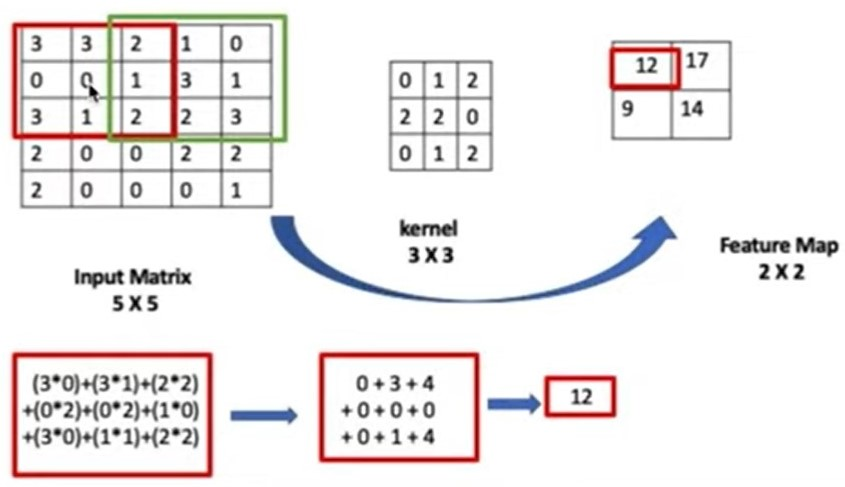

In [12]:
from IPython.display import Image
Image(filename='dl3.jpg')

In [13]:
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2,2), input_shape=(5,5,1)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 2, 2, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.set_weights(weights)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 41ms/step
[12.0, 17.0]
[9.0, 14.0]


## PADDING

•Padding is the best approach, where the number of pixels needed for the convolutional kernel to process the edge pixels are added onto the outside copying the pixels from the edge of the image.

•Fix the Border Effect Problem With Padding.

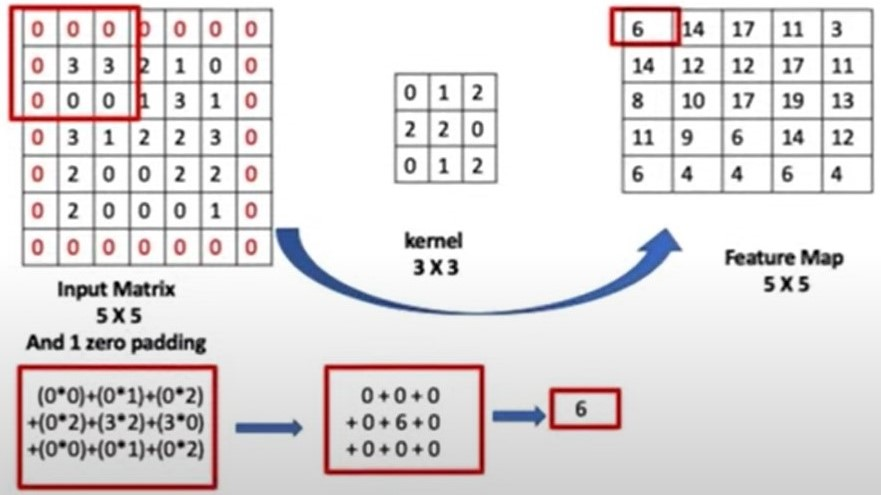

In [15]:
from IPython.display import Image
Image(filename='dl4.jpg')

In [16]:
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(5,5,1)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.set_weights(weights)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 42ms/step
[6.0, 14.0, 17.0, 11.0, 3.0]
[14.0, 12.0, 12.0, 17.0, 11.0]
[8.0, 10.0, 17.0, 19.0, 13.0]
[11.0, 9.0, 6.0, 14.0, 12.0]
[6.0, 4.0, 4.0, 6.0, 4.0]


## POOLING

•Pooling is required to down sample the detection of features in feature maps.

•Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

## MAX POOLING

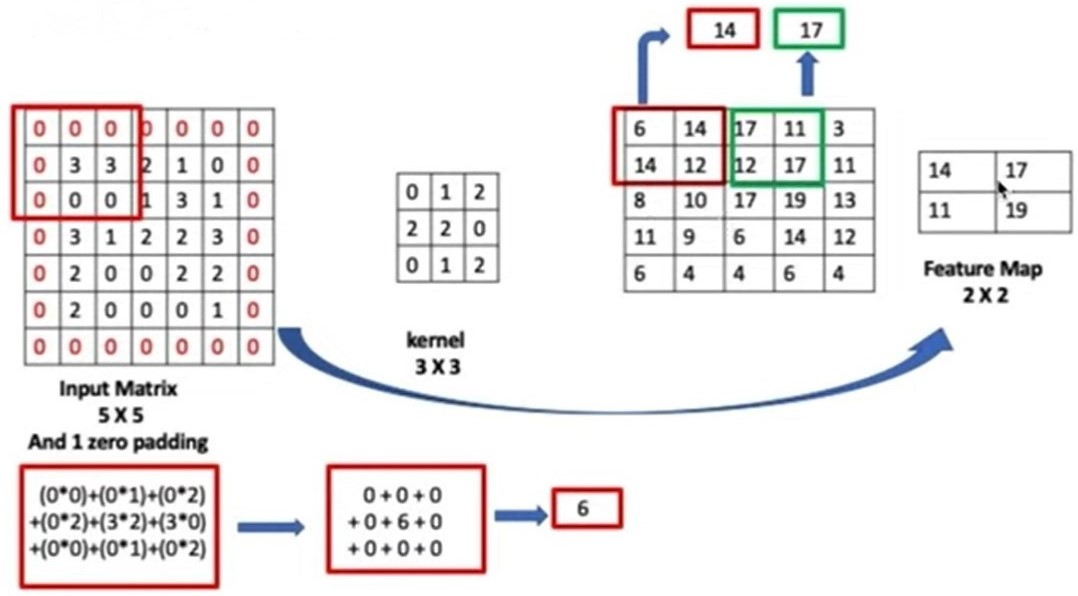

In [18]:
from IPython.display import Image
Image(filename='dl5.jpg')

In [19]:
from keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(5,5,1)))
model.add(MaxPooling2D((2,2)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 1)           0         
 D)                                                              
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.set_weights(weights)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 37ms/step
[14.0, 17.0]
[11.0, 19.0]


## AVERAGE POOLING

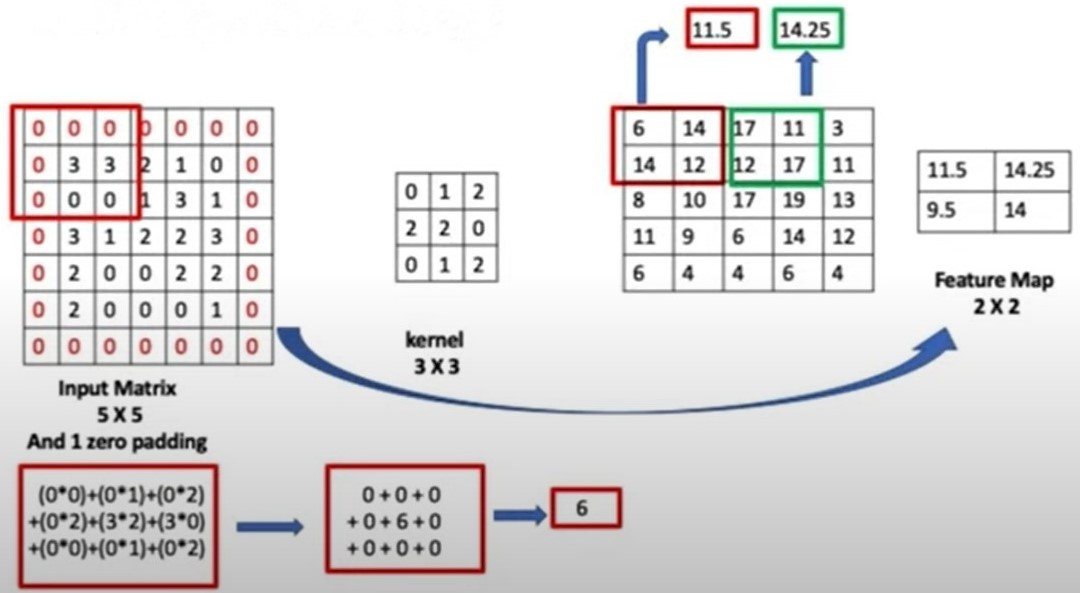

In [21]:
from IPython.display import Image
Image(filename='dl6.jpg')

In [22]:
from keras.layers import AveragePooling2D
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(5,5,1)))
model.add(AveragePooling2D((2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 average_pooling2d (Average  (None, 2, 2, 1)           0         
 Pooling2D)                                                      
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.set_weights(weights)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 60ms/step
[11.5, 14.25]
[9.5, 14.0]


## FLATTEN

•Once the pooled featured map is obtained, the next step is to flatten it.

•It involves transforming the entire pooled feature map matrix into a single column which is then fed to the neural network for processing.

In [24]:
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(1, (3,3), padding='same', input_shape=(5,5,1)))
model.add(AveragePooling2D((2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 average_pooling2d_1 (Avera  (None, 2, 2, 1)           0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.set_weights(weights)
yhat=model.predict(data)
print(yhat)

1/1 [==============================] - 0s 40ms/step
[[11.5  14.25  9.5  14.  ]]


# CNN Operations on image

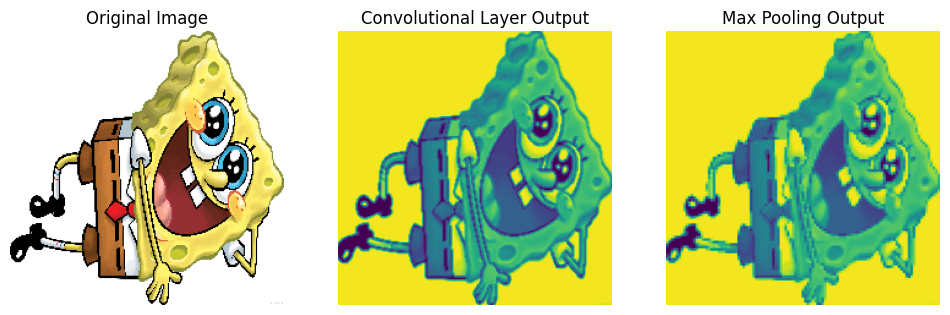

Shape of Flattened Result: (1, 394272)


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image (you can replace this with your own image)
image_path = 'img28.png'  # Replace with your image file path
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Define convolutional layer parameters
kernel_size = (3, 3)
strides = (1, 1)
padding = 'valid'

# Create a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten()
])

# Perform CNN operations on the image
convolution_result = model.layers[0](image)  # Apply convolution
pooling_result = model.layers[1](convolution_result)  # Apply pooling
flattened_result = model.layers[2](pooling_result)  # Flatten the output

# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(image[0] / 255.0)  # Normalize the pixel values for display
plt.axis('off')

plt.subplot(132)
plt.title('Convolutional Layer Output')
plt.imshow(convolution_result[0, :, :, 0], cmap='viridis')
plt.axis('off')

plt.subplot(133)
plt.title('Max Pooling Output')
plt.imshow(pooling_result[0, :, :, 0], cmap='viridis')
plt.axis('off')

plt.show()

# Print the shape of the flattened result
print("Shape of Flattened Result:", flattened_result.shape)
